# Spatial sampling

Import required modules

In [1]:
import cv2
from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt
import matplotlib

## Helper functions

Read image from input file into a `numpy.ndarray` variable of two dimensions (grayscale) with 32-bit float entries.

In [2]:
def read_input_image(input_file_name):
    """
    Read image from input file into a numpy.ndarray variable of two dimensions (grayscale) with 32-bit float entries.
    """

    # Set the flag argument to 0 so that the output has only one channel.
    return cv2.imread(input_file_name, 0).astype('float')

---

Save output image to a file.

In [3]:
def write_output_image_to_file(output_image, output_file_name):
    """
    Save output image to a file.
    """

    cv2.imwrite(output_file_name, output_image)
    return

---

Ensure that the sub-sampling factor is not too large.

In [4]:
def check_size(input_image, factor):
    """
    Check if the subsampling factor is too large.
    Input parameters:
        input_image: the input image
        factor: the required sub-sampling factor
    """

    condition1 = ((input_image.shape[0] // factor) == 0)
    condition2 = ((input_image.shape[1] // factor) == 0)
    
    if condition1 or condition2:
        print('Error! Subsampling rate is too large.')
        return 0
    
    else:
        print('Sub-sampling factor is permissible.')
        return 1

---

Sub-sample the image

In [5]:
def subsample_image(input_image, factor):
    """
    Subsample the input image with the requested subsampling factor.
    Input parameters:
        input_image: the input image
        factor: the required sub-sampling factor
    Output: 
        the sub-sampled image
    """

    # ************************************
    # TODO
    # ************************************
    # Currently, the output image is just being set to the input image.
    # Replace this with the appropriate sub-sampling code
    # Hint: You may do this using a double for loop, but there is also a way to do this with one line of code!
    # ************************************
    output_image = input_image[::factor,::factor]
    
    return output_image

---

Apply a gaussian blurring to the image

In [6]:
def gaussian_filter_image(input_image, sigma):
    """
    Apply a gaussian blurring to the image
    Input parameters:
        input_image: the input image
        sigma: strength of the required gaussian blurring
    Output:
        gaussian blurred image
    """

    # ************************************
    # TODO
    # ************************************
    # Currently, the output image is just being set to the input image.
    # Replace this with the appropriate code for smooth the image
    # Hint: Look at the modules being imported in the first cell of the notebook.
    # ************************************    
    output_image = gaussian_filter(input_image, sigma=sigma)
    
    return output_image

---

Print the size of the image

In [7]:
def print_image_size(image,image_name):
    """
    Print the size of the image
    Input parameters:
        image: the image whose size is required
        image_name: string to indicate the image content
    """
    
    print('Size of {:s}: {:d}, {:d}.'.format(image_name, image.shape[0], image.shape[1]))

---

Display an image

In [26]:
def display_image(image,title):
    """
    Display an image
    Input parameters:
        image: the image to be displayed
        title: title of the figure
    """

    fig = matplotlib.pyplot.gcf()
    DPI = fig.get_dpi()
    # plt.figure(figsize=(image.shape[0]/float(DPI),image.shape[1]/float(DPI)))
    plt.figure(figsize=(8,8))
    plt.imshow(image, cmap=plt.cm.gray)
    plt.axis('off')
    plt.title(title)
    plt.show()

## Main function

In [9]:
def main_function(input_file, factor, sigma):
    """
    Input parameters:
        input_file: path to the input image
        factor: sub-sampling factor
        sigma: strength of the gaussian blurring
    """
    
    # Read the input image
    I_input = read_input_image(input_file)

    # display the input image
    display_image(I_input, 'Input image')
    
    # Print the size of the input image
    print_image_size(I_input, 'Input image')
    
    print('\n==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ====')
    
    # print the requested sub-sampling factor
    print('Requested sub-sampling factor: {:d}.'.format(factor))

    # check if the sub-sampling factor is permissible
    if check_size(I_input, factor) == 0:
        return -1
    
    print('\n==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ====')
    
    # if requested, blur the image using a gaussian filter
    if (sigma != 0):
        print('Applying a gaussian blur to the image.')
        I_input = gaussian_filter_image(I_input, sigma)
        display_image(I_input, 'Gaussian blurred image')
    else:
        print('Using the original image, without gaussian blurring.')
        
    print('\n==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ====')
    
    # Sub-sample the image
    I_output = subsample_image(I_input, factor)

    # display the sub-sampled image
    display_image(I_output, 'Sub-sampled image')
    
    # Print the size of the subsampled image
    print_image_size(I_output, 'Sub-sampled image')

<Figure size 432x288 with 0 Axes>

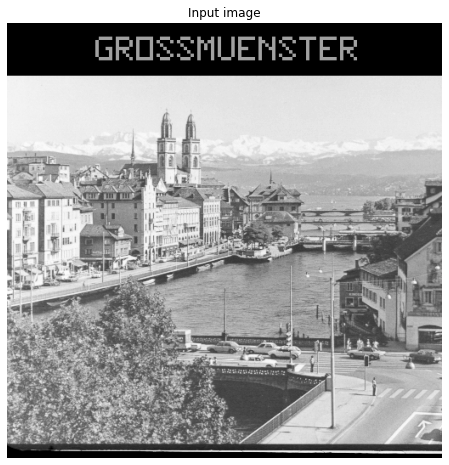

Size of Input image: 512, 512.

==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ====
Requested sub-sampling factor: 4.
Sub-sampling factor is permissible.

==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ====
Applying a gaussian blur to the image.


<Figure size 432x288 with 0 Axes>

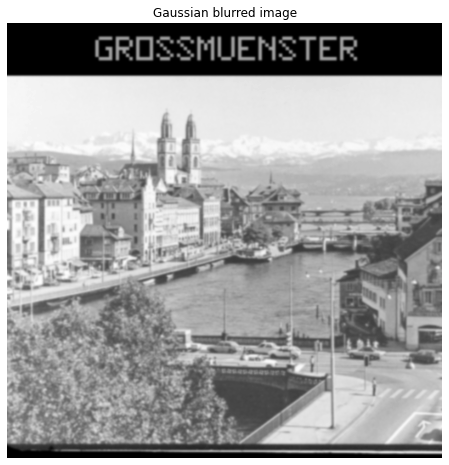


==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ====


<Figure size 432x288 with 0 Axes>

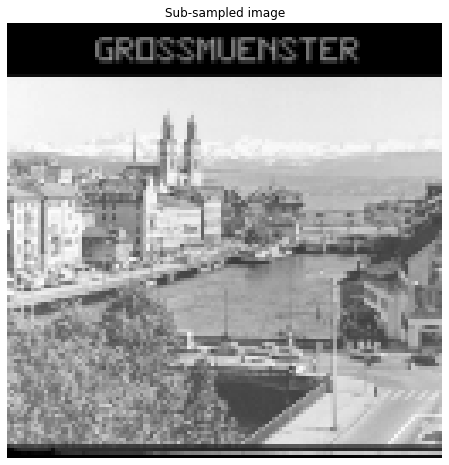

Size of Sub-sampled image: 128, 128.


In [35]:
# Try playing around with
# - different values of the sub-sampling factor
# - different values of the strength of the blurring
# - different images

path = 'C:\\Users\\lukaszbinden\\git\\ethz-iacv-2020\\exercise_1\\'
input_file = 'carpet.png'
input_file = 'zurlim.png'
factor = 4
sigma = 1

# Call the main_function
main_function(path + input_file, factor, sigma)